# Life Expectancy Case Study

## Context 
    
Many studies have been undertaken in the past on factors affecting life expectancy, considering demographic variables, income composition, and mortality rates. It was found that the effect of immunization and human development index was not taken into account in the past studies, and important immunizations like Hepatitis B, Polio, and Diphtheria should also be taken into account. In this case study, we will consider immunization factors, mortality factors, economic factors, social factors, and other health-related factors and use linear regression to see the effect of those factors on Life Expectancy.


## Objective
To analyze the data and build a linear regression model that can predict the life expectancy of the people of a country.


## Key Questions

- Does life expectancy have a positive or negative correlation with the different factors (immunization, mortality, socio-economic, etc.) taken into consideration for the countries?
- Can we build a linear model to predict life expectancy? If yes, how accurate will the model be?


## Data Description

The dataset contains immunization factors, mortality factors, economic factors, social factors, and other health-related factors for different countries across different years.

**Data Dictionary**

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in years
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in liters of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: number of reported cases of Measles per 1000 population
- BMI: Average Body Mass Index of the entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of schooling

## Let's start coding!

### Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

/usr/local/lib/python3.9/dist-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<IPython.core.display.Javascript object>

In [2]:
#!pip install nb_black

<IPython.core.display.Javascript object>

In [3]:
# loading the dataset
data = pd.read_csv("Life Expectancy Data.csv")

<IPython.core.display.Javascript object>

### Data Overview

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<IPython.core.display.Javascript object>

**Observations**

- The first five rows show data for Afghanistan across 5 different years.
- The life expectancy varies from 59.2 to 65 years.
- The *Status* column seems to have text values, which will have to be converted to numerics for modeling purposes.

In [5]:
# check number of rows and columns
data.shape

(2938, 22)

<IPython.core.display.Javascript object>

In [6]:
# take a look at the column names
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<IPython.core.display.Javascript object>

In [7]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

<IPython.core.display.Javascript object>

**Observations**

- Most of the columns in the data are numeric in nature (integer or float).
- `Country` and `Status` columns are of *object* type, which means they have text values.
- Some columns seem to have null (or missing) values too.

In [8]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
Infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
Percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2385.0,NaN,NaN,NaN,80.940461,25.070016,1.0,77.0,92.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


<IPython.core.display.Javascript object>

**Observations**

- There are 193 countries in the dataset.
- Most of the countries in the dataset are developing countries.
- The average life expectancy is ~69 years.

**Let's fix the missing values.**

- For the target variable (`Life expectancy`), we will drop the missing values.
- For the predictor variables, we will replace the missing values in each column with its median.

In [9]:
# we first create a copy of the original data to avoid changes to it
df = data.copy()

<IPython.core.display.Javascript object>

In [10]:
# dropping missing values in the target
df.dropna(subset=["Life expectancy"], inplace=True)

<IPython.core.display.Javascript object>

In [11]:
# filling missing values using the column median for the predictor variables
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [12]:
# checking the number of missing values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness  1-19 years               0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

<IPython.core.display.Javascript object>

- All the missing values have been treated.

In [13]:
# check the number of unique values in each column of the dataframe
df.nunique()

Country                             183
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
Infant deaths                       209
Alcohol                            1076
Percentage expenditure             2323
Hepatitis B                          87
Measles                             958
BMI                                 603
Under-five deaths                   252
Polio                                73
Total expenditure                   816
Diphtheria                           81
HIV/AIDS                            200
GDP                                2485
Population                         2278
Thinness  1-19 years                200
Thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- The *Status* column has 2 unique values - "*Developing*" and "*Developed*"
- The *Country* column has 183 unique values, i.e., the data is collected from 183 countries.

**We know that the datatype of two columns (`Status` and `Country`) is object. So, we need to convert them to categorical type for further processing in the next steps.**

**Before we further process the data, let's take a look at the graphical visualization of the data to understand it in a better way.**

## EDA

### Univariate analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Let's explore the dependent variable *Life expectancy***

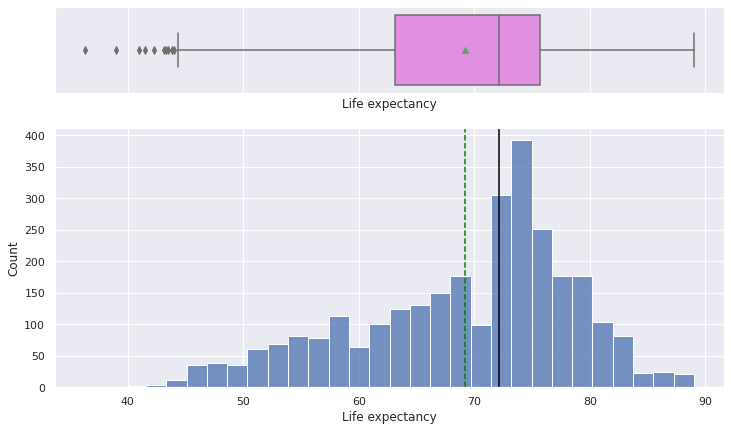

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Life expectancy")

**Observations**

- `Life expectancy` is left-skewed, which means some countries have life expectancy less than 45 years.
- Mean life expectancy is around 72 years.

**Let's explore per capita alcohol consumption**

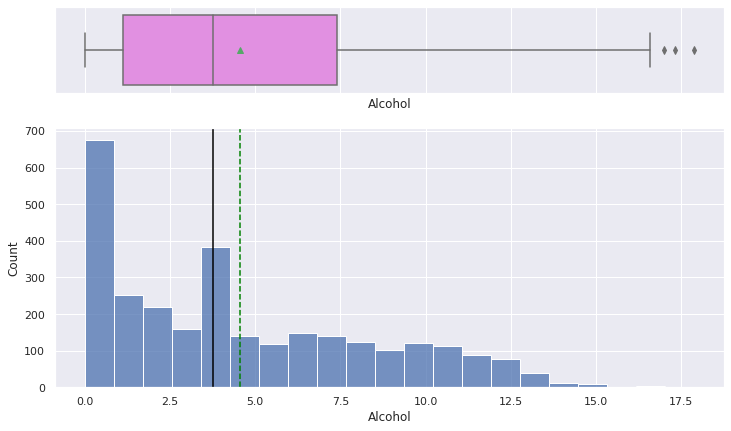

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Alcohol")

**Observations**

* The median alcohol consumption is 3.75 litres.
* There are some outliers where average alcohol consumption is more than 15 litres.
* The distribution is right-skewed.

**Let's explore GDP**

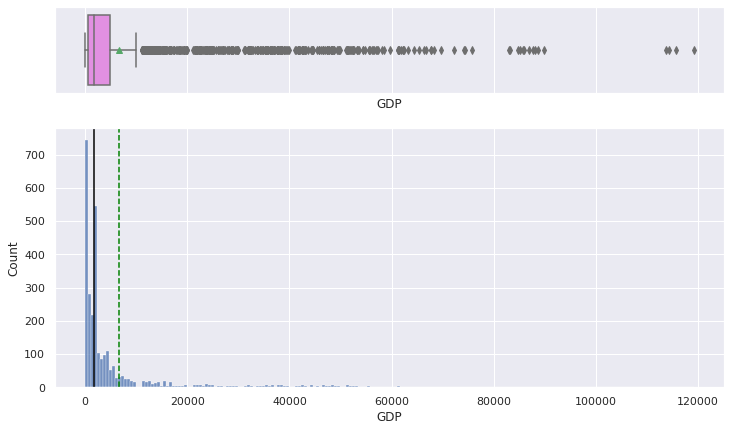

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "GDP")

**Observations**

* The distribution of GDP is heavily skewed to the right.
* The outliers to the right indicate that many countries have a very high GDP.

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

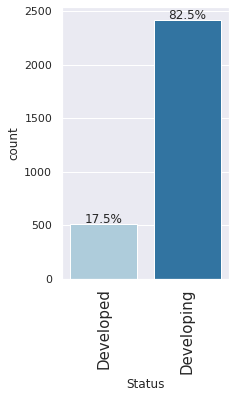

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "Status", perc=True)

- More than 80% of the countries in the data are developing countries.

### Bivariate Analysis

**Let's look at correlations.**

In [20]:
# correlation of all attributes with life expectancy
df[df.columns[:]].corr()["Life expectancy"][:]

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
Infant deaths                     -0.196557
Alcohol                            0.390674
Percentage expenditure             0.381864
Hepatitis B                        0.171255
Measles                           -0.157586
BMI                                0.558888
Under-five deaths                 -0.222529
Polio                              0.459458
Total expenditure                  0.209588
Diphtheria                         0.473268
HIV/AIDS                          -0.556556
GDP                                0.430991
Population                        -0.028842
Thinness  1-19 years              -0.467859
Thinness 5-9 years                -0.462645
Income composition of resources    0.688591
Schooling                          0.717314
Name: Life expectancy, dtype: float64

<IPython.core.display.Javascript object>

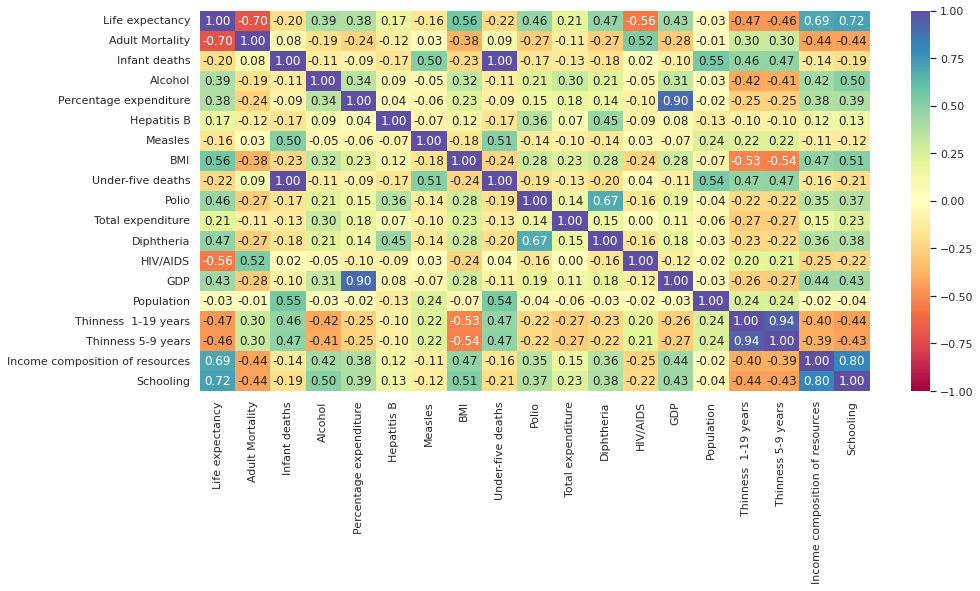

<IPython.core.display.Javascript object>

In [21]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Year")  # dropping year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations**

* `Life expectancy` is highly negatively correlated with `Adult Mortality` and `HIV/AIDs`, which means that as adult mortality and HIV death (0-4 years) increases, life expectancy tends to decrease.

* `Life expectancy` is highly positively correlated with `Schooling` and `Income composition of resources`, which means that as schooling years of citizens in a country and income composition of resources increases, life expectancy tends to increase.

**Let's look at the graphs of a few variables that are highly correlated with `Life expectancy`.**

**`Life expectancy` vs `HIV/AIDS` vs `Status`**

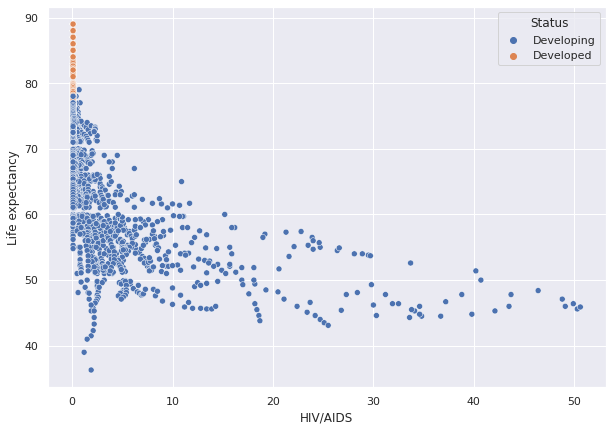

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="HIV/AIDS", hue="Status", data=df)
plt.show()

* Developed countries have very low cases of HIV/AIDS.

**`Life expectancy` vs `Schooling` vs `Status`**

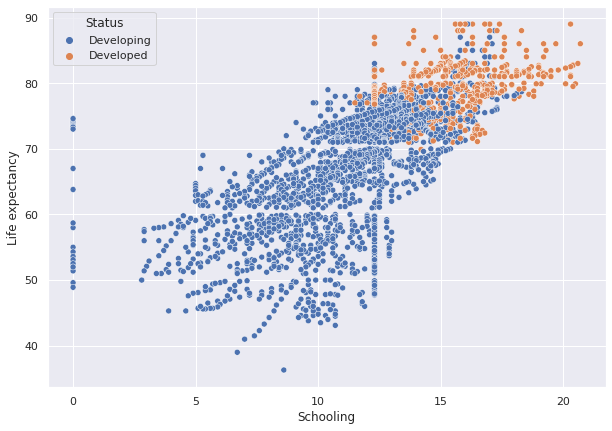

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="Schooling", hue="Status", data=df)
plt.show()

**Observations**

* Majority of the developed countries have schooling of more than 13 years.
* Developing countries have a higher variance in schooling years.

**Let's check the variation in life expectancy across years.**

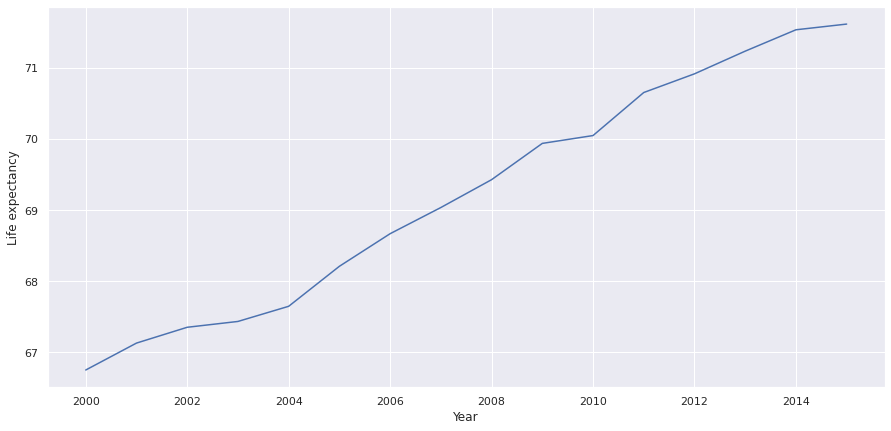

<IPython.core.display.Javascript object>

In [24]:
# average life expectancy over the years
plt.figure(figsize=(15, 7))
sns.lineplot(x="Year", y="Life expectancy", data=df, ci=None)
plt.show()

* Overall life expectancy of the world population is increasing over the years.

### Column binning

- Let's group all countries into continents to avoid having too many dummy variables while modeling.

In [25]:
# Installing library to group countries into continents
# Please uncomment the next line and run the cell to install the library

# !pip install pycountry-convert

<IPython.core.display.Javascript object>

In [26]:
# Let's group coutries into continents
import pycountry_convert as pc


def country_to_continent(country_name):
    """
    country_name : name of country for which continent is needed
    """
    if "(" in country_name:
        country_name = country_name.split(" ")[0]
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(
        country_continent_code
    )
    return country_continent_name

<IPython.core.display.Javascript object>

In [27]:
df.Country.apply(country_to_continent)

KeyError: "Invalid Country Name: 'Republic of Korea'"

<IPython.core.display.Javascript object>

* Above error is arising because names of the countries are different from what the library has. 
* In order to resolve this, we looked at all country names that caused this error and hard-coded them as shown below.

In [28]:
loc = df.Country.tolist()
continent = dict()

# hard-coding the continent names of those countries which were giving error with country_to_continent function
for cn in loc:
    if cn == "Republic of Korea":
        continent[cn] = "Asia"
    elif cn == "The former Yugoslav republic of Macedonia":
        continent[cn] = "Europe"
    elif cn == "Timor-Leste":
        continent[cn] = "Asia"
    else:
        continent[cn] = country_to_continent(cn)

<IPython.core.display.Javascript object>

In [29]:
# mapping every country to its continent
df["Continent"] = df["Country"].map(continent)

<IPython.core.display.Javascript object>

In [30]:
# let us look at unique continents
print(df["Country"].map(continent).unique())

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


<IPython.core.display.Javascript object>

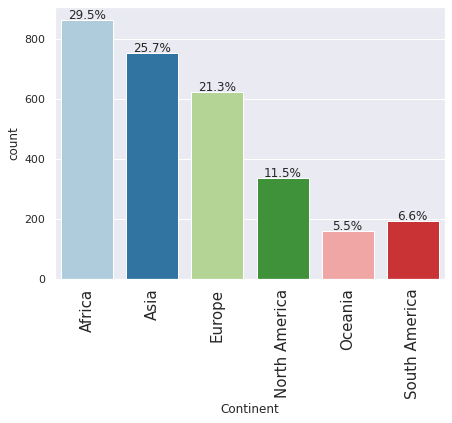

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "Continent", perc=True)

**Observations**

- More than 75% of the data points are from Africa, Asia, and Europe.
- Oceania accounts for only 5.5% of the data points.

**`Life expectancy` vs `Adult Mortality` vs `Continent`**

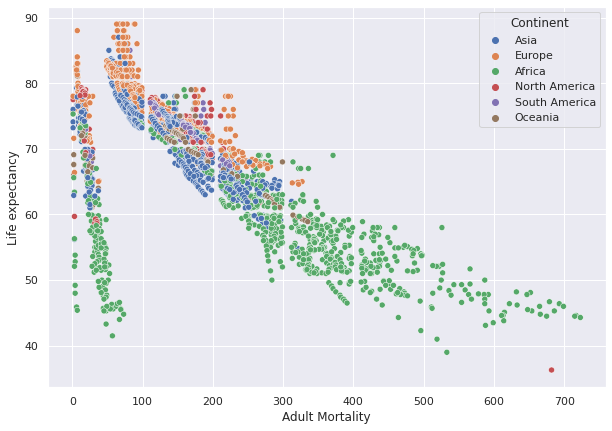

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Life expectancy", x="Adult Mortality", hue="Continent", data=df)
plt.show()

* Many European countries have had life expectancy higher than 80 years for some years.
* Most of the African countries have higher adult mortality and life expectancy lower than 65 years.

**Median `Life expectancy` by `Country` and `Status`**

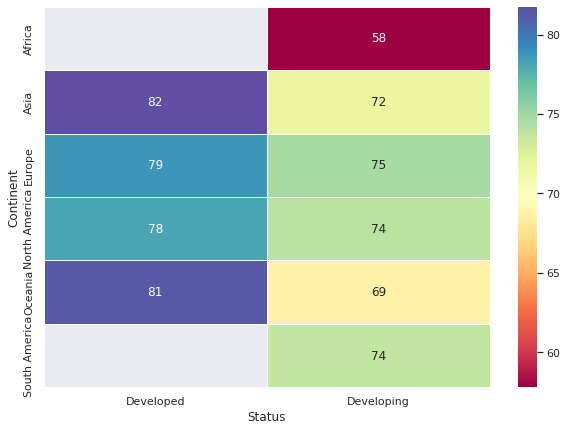

<IPython.core.display.Javascript object>

In [33]:
df_hm = df.pivot_table(
    index="Continent", columns="Status", values="Life expectancy", aggfunc=np.median
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

- Developed countries from Asia have the highest life expectancy.

**Let's convert the *object* type columns to *category* type**

In [34]:
df["Country"] = df["Country"].astype("category")
df["Status"] = df["Status"].astype("category")
df["Continent"] = df["Continent"].astype("category")

<IPython.core.display.Javascript object>

## Linear Model Building

1. We want to predict the life expectancy.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [35]:
# defining X and y variables
X = df.drop(["Life expectancy", "Country"], axis=1)
y = df["Life expectancy"]

print(X.head())
print(y.head())

   Year      Status  Adult Mortality  Infant deaths  Alcohol  \
0  2015  Developing            263.0             62     0.01   
1  2014  Developing            271.0             64     0.01   
2  2013  Developing            268.0             66     0.01   
3  2012  Developing            272.0             69     0.01   
4  2011  Developing            275.0             71     0.01   

   Percentage expenditure  Hepatitis B  Measles   BMI  Under-five deaths  ...  \
0               71.279624         65.0     1154  19.1                 83  ...   
1               73.523582         62.0      492  18.6                 86  ...   
2               73.219243         64.0      430  18.1                 89  ...   
3               78.184215         67.0     2787  17.6                 93  ...   
4                7.097109         68.0     3013  17.2                 97  ...   

   Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0               8.16        65.0       0.1  584.259210  33

<IPython.core.display.Javascript object>

In [36]:
# let's add the intercept to data
X = sm.add_constant(X)
X.head()

,const,Year,Status,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Continent
0,1.0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,1.0,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,1.0,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,1.0,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,1.0,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


<IPython.core.display.Javascript object>

In [37]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,Year,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,...,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Status_Developing,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1.0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,17.2,17.3,0.479,10.1,1,1,0,0,0,0
1,1.0,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,17.5,17.5,0.476,10.0,1,1,0,0,0,0
2,1.0,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,17.7,17.7,0.470,9.9,1,1,0,0,0,0
3,1.0,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,17.9,18.0,0.463,9.8,1,1,0,0,0,0
4,1.0,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,18.2,18.2,0.454,9.5,1,1,0,0,0,0


<IPython.core.display.Javascript object>

In [38]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [39]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2049
Number of rows in test data = 879


<IPython.core.display.Javascript object>

In [40]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     448.3
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:01:20   Log-Likelihood:                -5612.6
No. Observations:                2049   AIC:                         1.128e+04
Df Residuals:                    2023   BIC:                         1.142e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<IPython.core.display.Javascript object>

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.845**, which is good!


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for *const* coefficient is **-10.0359**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `Adult Mortality` is **-0.0162**.

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [41]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [42]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.7444,2.832731,0.847098,0.845132,4.308428


<IPython.core.display.Javascript object>

In [43]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.730845,2.820497,0.842311,0.837499,4.280578


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.85, so the model is not underfitting.

- The train and test RMSE and MAE are comparable, so the model is not overfitting either.

- MAE suggests that the model can predict life expectancy within a mean error of 2.8 years on the test data.

- MAPE of 4.3 on the test data means that we are able to predict within 4.3% of the life expectancy.

## Conclusion

- We have seen how to build a linear regression model, how to predict the life expectancy of the population using various factors, and how to check the model's performance.

- Next, we have to check the statistical validity of our model. For this, we will check if the model satisfies the assumptions of linear regression. Only then we will be able to make inferences from it.

### We will be discussing the assumptions of linear regression and statistical inference in the next session.